#### Spatial Data Science Conference - 2023 
## Foundations of Geospatial 
#### Danny Sheehan Climate Change Solutions Architect at AWS
![image](https://spatial-data-science-conference.com/img/2023/repository/ny-summit-card-1.png)



**Work:**
- AWS
- Jupiter Intelligence
- Mount Sinai Emergency Medicine
- UBS Investment Bank
- AutoCEQR 
- Carto 
- Columbia University
- AECOM, etc.  

**Education:**
- Columbia University
- University at Buffalo
- Geneseo

**Teaching:**
- Columbia University
- Barnard College
- Pratt Institute

**Certifications:**
- Data Science (Columbia University, General Assembly)
- AWS CCP, Prefect, etc. 

LinkedIn: https://www.linkedin.com/in/daniel-martin-sheehan/


##### Dependencies

This Notebook uses https://rise.readthedocs.io/en/stable/ - use `jupyter notebook` to use, not lab :/

In [1]:
import warnings
warnings.filterwarnings('ignore')
# See README.md for all libraries and steps to create the environment. 

import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import rasterio
from rasterstats import zonal_stats
import numpy as np
import osmnx as ox

%matplotlib inline


In [2]:
import shapely
shapely.__version__

'2.0.1'

# Geospatial Data Models

> A data model is a way of defining and representing real world surfaces and characteristics in GIS. 

> There are two primary types of spatial data models: **Vector** and **Raster**.

Source: http://gsp.humboldt.edu/OLM/Courses/GSP_216_Online/lesson3-1/data-models.html



## Vector
**Vector** data represents features as discrete points, lines, and polygons

## Raster
**Raster**  data represents features as a rectangular matrix of square cells (pixels)

![image.png](img/raster-vector.png)

Source: http://www.geo.umass.edu/courses/geo494a/Chapter2_GIS_Fundamentals.pdf

### TIN Data model 

> A triangulated irregular network (TIN)
is a data model commonly used to represent
terrain heights - Source: http://www.geo.umass.edu/courses/geo494a/Chapter2_GIS_Fundamentals.pdf

Typical use cases are for terrain inluts in Hydrologic Modeling / Watershed Modeling. 

![tin](img/tin.png)

Source: http://www.geo.umass.edu/courses/geo494a/Chapter2_GIS_Fundamentals.pdf


# Vector Data Model

> Vector data is very common, and is often used to represent features like roads and boundaries. Vector data comes in the form of points and lines that are geometrically and mathematically associated.  

> * Points:
    * One pair of coordinates defines the location of a point feature.

> * Polylines (LineStrings):
    * Two or more pairs of coordinates that are connected define a line feature.
    * A series of connected points

> * Polygons:
    * Multiple pairs of coordinates that are connected and closed define a polygon feature.
    * A series of connected points that loop back to the first point
      * Multiple "polygons" can exist in one layer
      * Polygons can have internal polygons or "holes"
      * The beginning and ending coordinates for a polygon are the same.
      
Source: http://gsp.humboldt.edu/OLM/Courses/GSP_216_Online/lesson3-1/data-models.html

# Shapely
One dependency (another Python Library GeoPandas depends on) is [Shapely](https://shapely.readthedocs.io/en/latest/manual.html)

> Shapely is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library. GEOS, a port of the Java Topology Suite (JTS), is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS. The designs of JTS and GEOS are largely guided by the Open Geospatial Consortium’s Simple Features Access Specification 1 and Shapely adheres mainly to the same set of standard classes and operations. Shapely is thereby deeply rooted in the conventions of the geographic information systems (GIS) world, but aspires to be equally useful to programmers working on non-conventional problems.

Source: https://shapely.readthedocs.io/en/latest/manual.html

## Vector
### Points

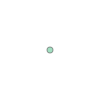

In [3]:
from shapely.geometry import Point
point = Point(
    0.0, 
    0.0)

point

### Lines - (LineString)

In [4]:
from shapely.geometry import LineString

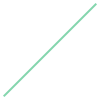

In [6]:
line = LineString([(0, 0), (2, 2)])
line

In [7]:
a = LineString([(0, 0), (1, 1), (1, 2), (2, 2)])
b = LineString([(0, 0), (1, 1), (2, 1), (2, 2)])

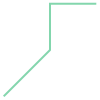

In [8]:
a

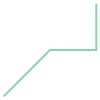

In [9]:
b

#### Intersection of Two LineString Objects

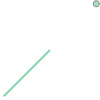

In [10]:
x = a.intersection(b)
x

### Polygons

In [11]:
from shapely.geometry import Polygon

In [12]:
c = Polygon([[1, 1], [-1, 3], [3, 3], [3, 1]])
d = Polygon([[0, 0], [0, 4], [4, 4], [4, 1]])

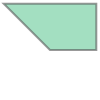

In [13]:
c

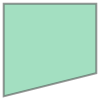

In [14]:
d

#### Intersection of Two Polygons

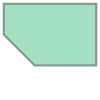

In [15]:
x = c.intersection(d)
x

### MultiPoint

In [16]:
from shapely.geometry import MultiPoint

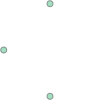

In [17]:
e = MultiPoint([(0, 0), (1, 1), (1, -1)])
e

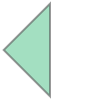

In [18]:
e.convex_hull  # minimum bounding geometry

# Pandas

![pandas-img](https://pandas.pydata.org/static/img/pandas.svg)

# Introduction to Pandas

> pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Source: https://pandas.pydata.org/pandas-docs/stable/index.html

If totally new to Pandas, you can think of Pandas as the table (.dbf) of a Shapefile or as a Sheet in Excel or Google Spreadsheet. 

## Pandas DataFrame
> DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input. Source: https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html


![pandas_dataframe](https://pandas.pydata.org/pandas-docs/stable/_images/01_table_dataframe.svg)
<center> Source: https://pandas.pydata.org/pandas-docs/stable/getting_started </center>

### Reading in a .csv into Pandas

In [19]:
csv_url = 'https://data.cityofnewyork.us/api/views/he7q-3hwy/rows.csv?accessType=DOWNLOAD'

In [20]:
df = pd.read_csv(csv_url)

In [21]:
# show a random sample of rows from the .csv data read in to the DataFrame object
df.sample(8)

,OBJECTID,URL,NAME,the_geom,LINE
1181,1037,http://web.mta.info/nyct/service/,8th Ave & 9th St at NE corner,POINT (-73.9790069998167 40.66583500062997),F
1136,992,http://web.mta.info/nyct/service/,6th Ave & 57th St at SE corner,POINT (-73.97726400033272 40.763998000643525),F
110,1844,http://web.mta.info/nyct/service/,7th Ave & 55th St at SE corner,POINT (-73.98080300054961 40.76405700096569),N-Q-R
583,439,http://web.mta.info/nyct/service/,97th St & Liberty Ave at SW corner,POINT (-73.84255800024278 40.68077400101242),A
1356,1212,http://web.mta.info/nyct/service/,Nostrand Ave & Avenue H at NE corner,POINT (-73.94766499945733 40.63184500126443),2-5
1030,886,http://web.mta.info/nyct/service/,Van Siclen Ave & Pitkin Ave at SW corner,POINT (-73.89038100002684 40.6725450005473),A-C
1031,887,http://web.mta.info/nyct/service/,Van Siclen Ave & Pitkin Ave at NW corner,POINT (-73.89058399980156 40.672771000835766),A-C
402,258,http://web.mta.info/nyct/service/,Broadway & 50th St at SE corner,POINT (-73.98343599966064 40.76111100084517),1


In [22]:
# show the first handful of records using .head()

df.head(10)

,OBJECTID,URL,NAME,the_geom,LINE
0,1734,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NW corner,POINT (-73.86835600032798 40.84916900104506),2-5
1,1735,http://web.mta.info/nyct/service/,Birchall Ave & Sagamore St at NE corner,POINT (-73.86821300022677 40.84912800131844),2-5
2,1736,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.87349900050798 40.84122300105249),2-5
3,1737,http://web.mta.info/nyct/service/,Morris Park Ave & 180th St at NW corner,POINT (-73.8728919997833 40.84145300067447),2-5
4,1738,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SW corner,POINT (-73.87962300013866 40.84081500075867),2-5
5,1739,http://web.mta.info/nyct/service/,Boston Rd & E Tremont Ave at NW corner,POINT (-73.88000500027815 40.840434000875874),2-5
6,1740,http://web.mta.info/nyct/service/,Boston Rd & E Tremont Ave at NE corner,POINT (-73.87983300021861 40.84035400111976),2-5
7,1741,http://web.mta.info/nyct/service/,Boston Rd & 178th St at SE corner,POINT (-73.8795549998336 40.84063900116436),2-5
8,1742,http://web.mta.info/nyct/service/,Boston Rd & 178th St at NW corner,POINT (-73.87939700013239 40.84107800066419),2-5
9,1743,http://web.mta.info/nyct/service/,Boston Rd & 174th St at SW corner,POINT (-73.88804799985908 40.83732500129732),2-5


In [23]:
df.shape

(1928, 5)

In [24]:
df.value_counts('LINE')

LINE
F          125
1          120
6          113
2-5         92
A           75
          ... 
A-H          1
A-FS         1
A-C-J-L      1
A-C-FS       1
e-F-M-R      1
Name: count, Length: 97, dtype: int64

# GeoPandas

![geopandas-img](https://geopandas.org/en/stable/_static/geopandas_logo_web.svg)

#### GeoPandas

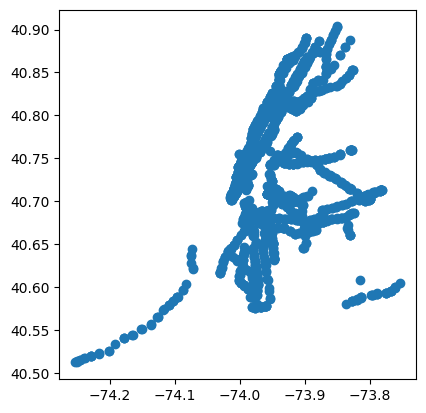

In [25]:
from shapely import wkt

gdf_subway = gpd.GeoDataFrame(
    df, geometry=df['the_geom'].apply(wkt.loads), 
    crs="EPSG:4326")

gdf_subway.plot();

In [26]:
gdf_subway.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
boro_geojson_link = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON'

In [28]:
# read in geojson as geopandas GeoDataFrame
gdf = gpd.read_file(boro_geojson_link)

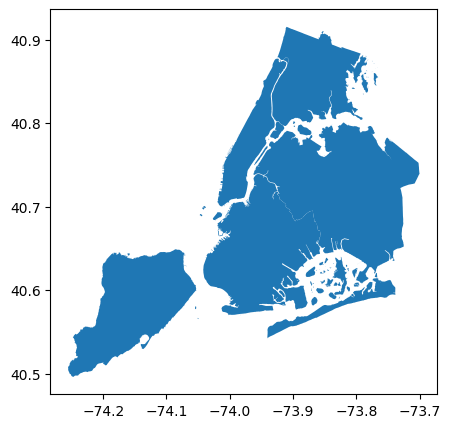

In [29]:
gdf.plot(figsize=(5, 5));  # nyc boros

In [30]:
gdf.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5,Staten Island,1623620725.06,325917.353702,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2,Bronx,1187174784.85,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1,Manhattan,636520830.768,357564.316391,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3,Brooklyn,1934143372.64,728197.541089,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4,Queens,3041418506.76,888199.731579,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [31]:
# what is the coordinate reference system?

gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### To change the Projection, we set the argument `inplace=True`

In [32]:
gdf.to_crs(epsg=2263, inplace=True)  
# changed the state of the projection systems

# what is 2263 ???

In [33]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Geoprocessing

Very broadly, **Geoprocessing** is any operation involving geospatial data or methods. The Geographic Information Systems (GIS) software company Esri refers to it as "[Computing with geographic data.](http://webhelp.esri.com/arcgisdesktop/9.3/index.cfm?TopicName=Comparing_Geoprocessing_and_Spatial_Analysis)" 

It is commonly used interchangeably with the term **[Spatial Analysis](http://webhelp.esri.com/arcgisdesktop/9.3/index.cfm?TopicName=Comparing_Geoprocessing_and_Spatial_Analysi)**. 
- However, Spatial Analysis includes the interpretation of the results of Geoprocessing. 



Professor Jochen Albrecht defines Geoprocessing as;
> ...any GIS operation used to manipulate data. A typical geoprocessing operation takes an input dataset, performs an operation on that dataset, and returns the result of the operation as an output dataset, also referred to as derived data. 

> Common geoprocessing operations are geographic feature overlay, feature selection and analysis, topology processing, and data conversion. 

> Geoprocessing allows you to define, manage, and analyze geographic information used to make decisions. - [Jochen Albrecht](http://www.geography.hunter.cuny.edu/~jochen/GTECH361/lectures/lecture12/concepts/01%20What%20is%20geoprocessing.htm)



### Geoprocessing Library Selection

There are several Geoprocessing libraries and technologies. A few notable open source ones are;

* [PostGIS](https://postgis.net/) - Spatially Enabled PostgreSQL 
* [CARTO](https://carto.com/platform#rapidly-carry-out-spatial-analysis-side-image) - Carto Spatial Analysis
* [GeoPandas](https://geopandas.org/) - Pandas Extended with [Shapely](https://shapely.readthedocs.io/en/latest/)
* [ArcPy / ArcGIS](https://pro.arcgis.com/en/pro-app/arcpy/get-started/what-is-arcpy-.htm) - Esri's Python site package
* [PyQGIS](https://docs.qgis.org/testing/en/docs/pyqgis_developer_cookbook/) - [QGIS](https://www.qgis.org/en/site/)'s Python Package
* [OGR/GDAL](https://gdal.org/) 
* Any several more (Alteryx, Tableau, etc.)

#### SQL 

- **[Carto Spatial SQL](https://carto.com/spatial-sql/)**
- **[PostGIS](https://postgis.net/)**
- **[Amazon Redshift](https://docs.aws.amazon.com/redshift/latest/dg/geospatial-functions.html)**
- **[Amazon Athena](https://docs.aws.amazon.com/athena/latest/ug/geospatial-functions-list-v2-function-name-changes-and-new-functions.html)**
- **[Trino](https://trino.io/docs/current/functions/geospatial.html)** 
- etc. 

```
SELECT
 ST_Intersects(a.the_geom, b.the_geom) AS the_geom
FROM
 a, b
```

#### ArcPy

> ArcPy is a Python site package that provides a useful and productive way to perform geographic data analysis, data conversion, data management, and map automation with Python. [Esri](https://pro.arcgis.com/en/pro-app/arcpy/get-started/what-is-arcpy-.htm)

Arcpy is for ArcGIS Desktop or ArcGIS Pro. The [ArcGIS API for Python](https://www.esri.com/en-us/arcgis/trial), using ArcGIS Online is also available for multiple platforms. 

```
arcpy.analysis.Intersect([feature_1, feature_2], out_feature)
```

# Geometric Manipulations

## Buffer

> Returns a GeoSeries of geometries representing all points within a given distance of each geometric object. Source: https://geopandas.org/geometric_manipulations.html

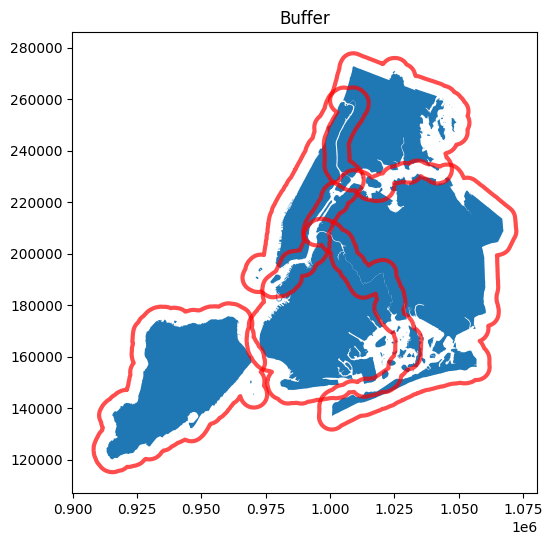

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(ax=ax)

gdf.buffer(5000).plot(ax=ax, facecolor="none", alpha=0.7, edgecolor='red', linewidth=3)

plt.title('Buffer');

## Centroid

> Returns a GeoSeries of points for each geometric centroid. Source: https://geopandas.org/geometric_manipulations.html#GeoSeries.boundary

> In mathematics and physics, the centroid or geometric center of a plane figure is the arithmetic mean position of all the points in the figure. 

Source: https://en.wikipedia.org/wiki/Centroid

![centroid](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/Triangle.Centroid.svg/440px-Triangle.Centroid.svg.png)
_Source: [https://en.wikipedia.org/wiki/Centroid](https://en.wikipedia.org/wiki/Centroid)_

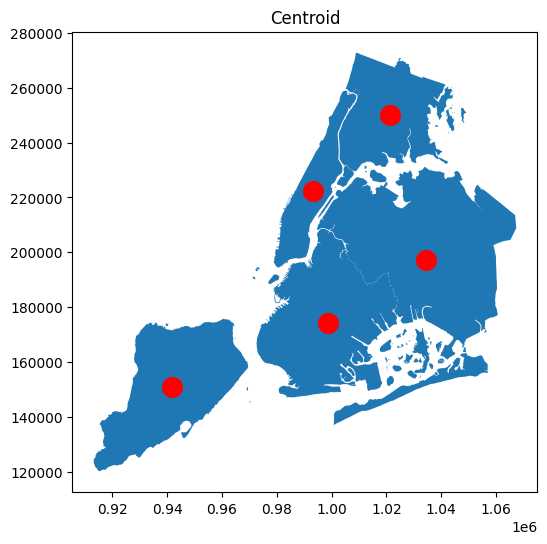

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(ax=ax)

gdf.centroid.plot(ax=ax, facecolor="red", markersize=200)

plt.title('Centroid');

## Convex Hull

> Returns a GeoSeries of geometries representing the smallest convex Polygon containing all the points in each object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point. Source: https://geopandas.org/geometric_manipulations.html#GeoSeries.boundary

> In geometry, the convex hull or convex envelope or convex closure of a shape is the smallest convex set that contains it. For a bounded subset of the plane, the convex hull may be visualized as the shape enclosed by a rubber band stretched around the subset. Source: https://en.wikipedia.org/wiki/Convex_hull

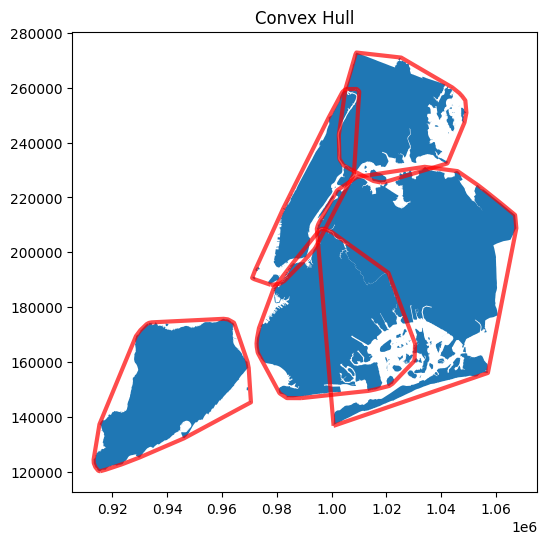

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(ax=ax)

gdf.convex_hull.plot(ax=ax, facecolor="none", alpha=0.7, edgecolor='red', linewidth=3)

plt.title('Convex Hull');

## Envelope

> Returns a GeoSeries of geometries representing the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains each object. Source: https://geopandas.org/geometric_manipulations.html#GeoSeries.boundary

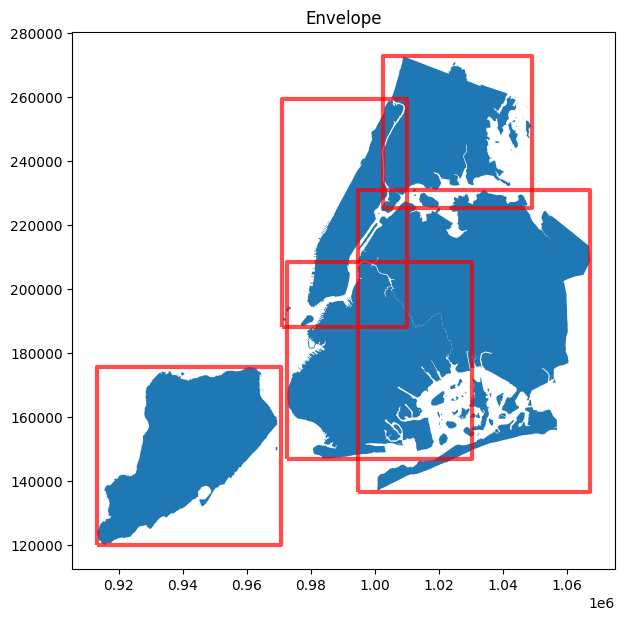

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))

gdf.plot(
    ax=ax, 
)

gdf.envelope.plot(ax=ax, facecolor="none", alpha=0.7,edgecolor='red', linewidth=3)

plt.title('Envelope');

## Simplify

> Returns a GeoSeries containing a simplified representation of each object. Source: https://geopandas.org/geometric_manipulations.html#GeoSeries.boundary

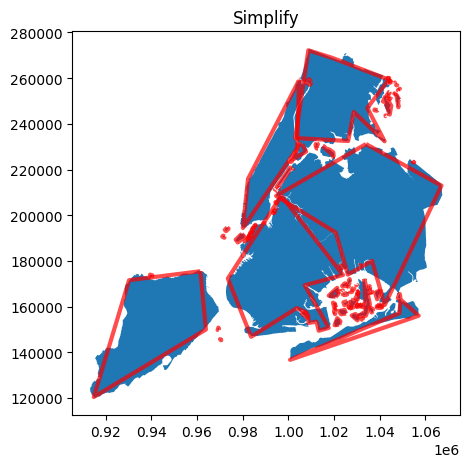

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
gdf.plot(ax=ax)

gdf.simplify(10000).plot(ax=ax, facecolor="none", alpha=0.7, edgecolor='red',  linewidth=3)

plt.title('Simplify');

# Spatial Join

> A spatial join uses binary predicates such as intersects and crosses to combine two GeoDataFrames based on the spatial relationship between their geometries.

> A common use case might be a spatial join between a point layer and a polygon layer where you want to retain the point geometries and grab the attributes of the intersecting polygons.

![spatial-join](https://web.natur.cuni.cz/~langhamr/lectures/vtfg1/mapinfo_1/about_gis/Image23.gif)


Can use **Spatial Join** for a **[Point-in-Polygon analysis](http://wiki.gis.com/wiki/index.php/Point_in_polygon)**. 

In [39]:
nyc_census_tracts = gpd.read_file(
    'https://data.cityofnewyork.us/api/geospatial/fxpq-c8ku?method=export&format=GeoJSON')

nyc_census_tracts = nyc_census_tracts[['boro_ct2010', 'geometry']]

In [41]:
nyc_census_tracts.head(10)

,boro_ct2010,geometry
0,5000900,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,1009800,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,1010200,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
3,1010400,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
4,1011300,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ..."
5,1013000,"MULTIPOLYGON (((-73.96148 40.77432, -73.96194 ..."
6,1018400,"MULTIPOLYGON (((-73.94181 40.80124, -73.94227 ..."
7,1020600,"MULTIPOLYGON (((-73.93581 40.80950, -73.93586 ..."
8,1024900,"MULTIPOLYGON (((-73.93669 40.83719, -73.93834 ..."
9,1026900,"MULTIPOLYGON (((-73.92770 40.85249, -73.92793 ..."


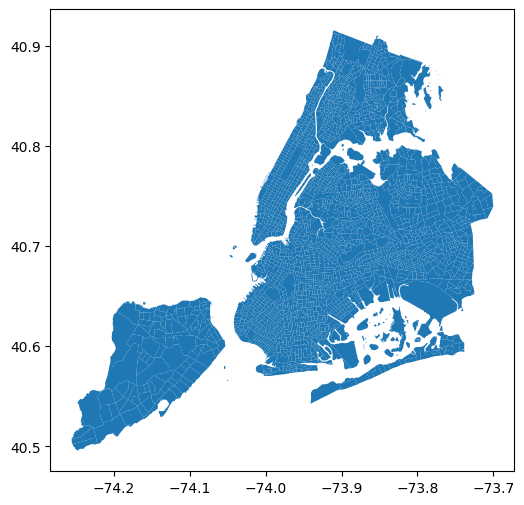

In [42]:
nyc_census_tracts.plot(figsize=(6, 6));

In [43]:
hotels_2020 = gpd.read_file(  # https://medium.com/@nygeog/data-science-data-focus-scraped-nyc-hotel-room-counts-for-covid19-response-quarantine-housing-8cc08c4d084a
    'https://raw.githubusercontent.com/autoceqr/get_nyc_hotels/master/data/nyc_hotels.geojson')

hotels_2020 = hotels_2020[['hotel_id', 'geometry', 'num_rooms']]
hotels_2020.head(5)

,hotel_id,geometry,num_rooms
0,181547,POINT (-73.83182 40.75967),173
1,55876,POINT (-73.98305 40.74278),131
2,42879,POINT (-73.98553 40.74463),337
3,5122464,POINT (-73.98950 40.73152),286
4,183709,POINT (-73.98667 40.74669),172


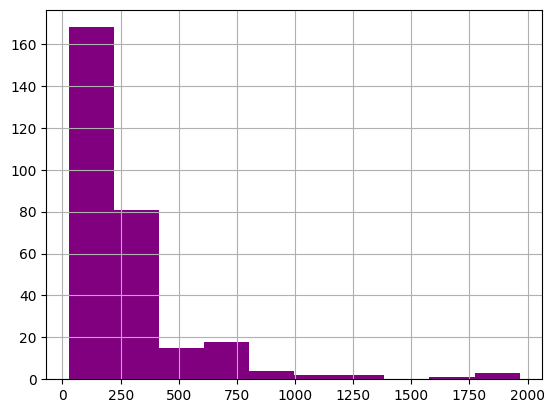

In [44]:
hotels_2020['num_rooms'].hist(bins=10, color='purple');

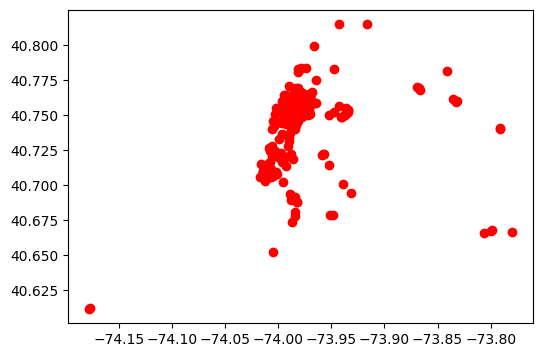

In [45]:
hotels_2020.plot(color='red', figsize=(6, 6));

In [46]:
sj_gdf = gpd.sjoin(  # <- SJOIN == SPATIAL JOIN
    hotels_2020,
    nyc_census_tracts, how="right") 

# going to preserve tracts, to keep tracts w/ out hotels in DataFrame

sj_gdf.head(15)

,index_left,hotel_id,num_rooms,boro_ct2010,geometry
0,NaN,NaN,NaN,5000900,"MULTIPOLYGON (((-74.07921 40.64343, -74.07914 ..."
1,264.0,905473.0,206.0,1009800,"MULTIPOLYGON (((-73.96433 40.75638, -73.96479 ..."
2,118.0,56409.0,398.0,1010200,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
2,155.0,270490.0,238.0,1010200,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
2,192.0,357419.0,909.0,1010200,"MULTIPOLYGON (((-73.97124 40.76094, -73.97170 ..."
3,61.0,2178340.0,86.0,1010400,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
3,78.0,186176.0,239.0,1010400,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
3,158.0,55861.0,177.0,1010400,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
3,260.0,1338472.0,27.0,1010400,"MULTIPOLYGON (((-73.97446 40.76229, -73.97491 ..."
4,48.0,1330071.0,300.0,1011300,"MULTIPOLYGON (((-73.98412 40.75484, -73.98460 ..."


In [47]:
# count hotels in tracts

count_hotels_in_tracts = sj_gdf[['boro_ct2010', 'hotel_id']].groupby(
    ['boro_ct2010'], as_index=False).count()

count_hotels_in_tracts.rename(columns={'hotel_id': 'num_hotels'}, inplace=True)
count_hotels_in_tracts.sort_values('num_hotels', ascending=False)

,boro_ct2010,num_hotels
116,1011500,14
137,1013700,12
109,1011100,11
82,1008400,11
120,1011900,9
...,...,...
773,3019100,0
772,3019000,0
771,3018800,0
770,3018700,0


In [48]:
# count total hotel rooms in tracts

count_rooms_in_tracts = sj_gdf[['boro_ct2010','num_rooms']].groupby(
    ['boro_ct2010'], as_index=False).sum()
count_rooms_in_tracts.sort_values('num_rooms', ascending=False)

,boro_ct2010,num_rooms
120,1011900,5766.0
137,1013700,5230.0
116,1011500,4427.0
131,1013100,4368.0
91,1009200,4036.0
...,...,...
773,3019100,0.0
772,3019000,0.0
771,3018800,0.0
770,3018700,0.0


In [49]:
# merge (join) our tables

nyc_census_tracts_with_hotel_data = nyc_census_tracts.merge(
    count_hotels_in_tracts, on='boro_ct2010', how='left').merge(
        count_rooms_in_tracts, on='boro_ct2010', how='left')

In [50]:
nyc_census_tracts_with_hotel_data.sort_values(
    ['num_hotels', 'num_rooms'], ascending=[False, False]) 

,boro_ct2010,geometry,num_hotels,num_rooms
1997,1011500,"MULTIPOLYGON (((-73.98979 40.75723, -73.99028 ...",14,4427.0
1776,1013700,"MULTIPOLYGON (((-73.97623 40.76567, -73.97670 ...",12,5230.0
765,1011100,"MULTIPOLYGON (((-73.99163 40.75471, -73.99208 ...",11,3256.0
675,1008400,"MULTIPOLYGON (((-73.98089 40.75348, -73.98094 ...",11,2080.0
416,1011900,"MULTIPOLYGON (((-73.98226 40.75739, -73.98271 ...",9,5766.0
...,...,...,...,...
2159,2005100,"MULTIPOLYGON (((-73.92518 40.81801, -73.92622 ...",0,0.0
2160,2006300,"MULTIPOLYGON (((-73.92222 40.83416, -73.92349 ...",0,0.0
2161,5007500,"MULTIPOLYGON (((-74.08588 40.63669, -74.08569 ...",0,0.0
2162,5007700,"MULTIPOLYGON (((-74.08709 40.64033, -74.08721 ...",0,0.0


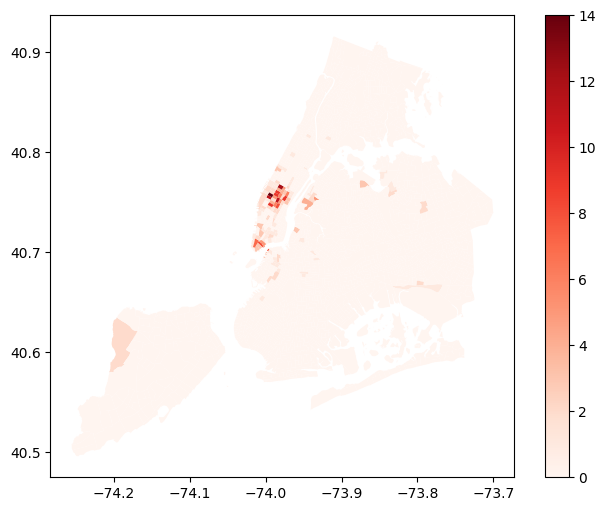

In [51]:
# number of hotels in census tracts
nyc_census_tracts_with_hotel_data.plot(
    column='num_hotels', colormap="Reds", legend=True, figsize=(8, 6));

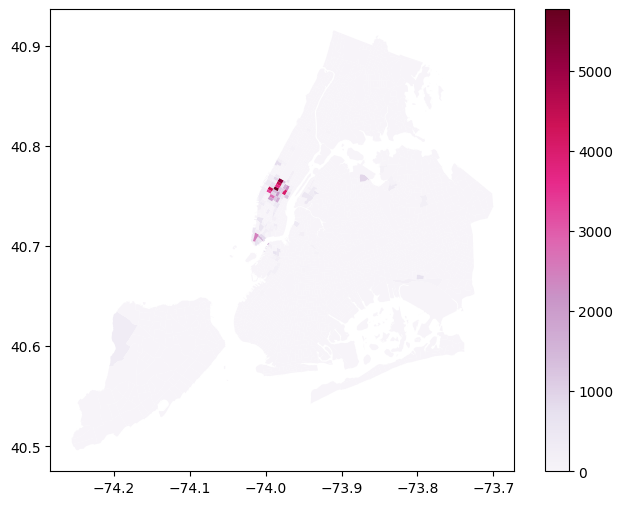

In [52]:
# number of hotel rooms in census tracts
nyc_census_tracts_with_hotel_data.plot(
    column='num_rooms', cmap='PuRd', legend=True, figsize=(8, 6));

# Set-Operations with Overlay

> When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections, unions, and differences. These types of operations are made available in the geopandas library through the overlay function.


![overlay](https://geopandas.org/_images/overlay_operations.png)
_Source: [https://geopandas.org/set_operations.html](https://geopandas.org/set_operations.html)_


> The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the DataFrame level, not on individual geometries, and the properties from both are retained. In effect, for every shape in the first GeoDataFrame, this operation is executed against every other shape in the other GeoDataFrame. Source: https://geopandas.org/set_operations.html

#### These Relationships follow the DE-9IM model

> The Dimensionally Extended nine-Intersection Model (DE-9IM) is a topological model and a standard used to describe the spatial relations of two regions (two geometries in two-dimensions, R2), in geometry, point-set topology, geospatial topology, and fields related to computer spatial analysis. The spatial relations expressed by the model are invariant to rotation, translation and scaling transformations. Source: https://en.wikipedia.org/wiki/DE-9IM

In [53]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/DE-9IM', width=1000, height=600)

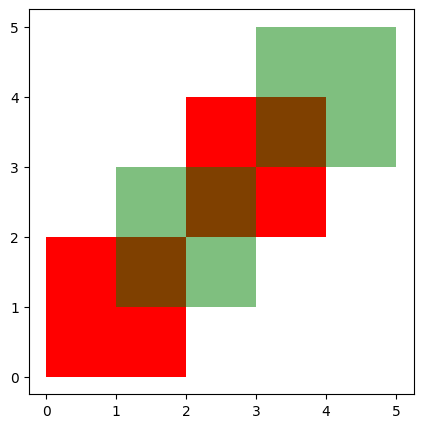

In [54]:
import geopandas
from shapely.geometry import Polygon
# WE HAVE THESE 2 SETS OF POLYGON LAYERS EACH WITH 2 FEATURES
polys1 = geopandas.GeoSeries([
    Polygon([(0,0), (2,0), (2,2), (0,2)]),
    Polygon([(2,2), (4,2), (4,4), (2,4)])])

polys2 = geopandas.GeoSeries([
    Polygon([(1,1), (3,1), (3,3), (1,3)]),
    Polygon([(3,3), (5,3), (5,5), (3,5)])])

df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

ax = df1.plot(color='red', figsize=(5, 5));
df2.plot(ax=ax, color='green', alpha=0.5);

# Union

> The output feature class will contain polygons representing the geometric union of all the inputs as well as all the fields from all the input feature classes. See below for examples of how attribute values are assigned to the output features. Source: https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/how-union-analysis-works.htm

![esri_union](https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/GUID-F81C8E85-1DA1-4857-B872-6CE30DDE3984-web.png)

In [55]:
res_union = geopandas.overlay(df1, df2, 
    how='union')
res_union  # FOR UNION - ALL AREAS ARE OUTPUTED, SLICED BY OVERLAP BORDERS

,df1,df2,geometry
0,1.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2.0,1.0,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2.0,2.0,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."
3,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
4,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."
5,NaN,1.0,"MULTIPOLYGON (((2.00000 2.00000, 3.00000 2.000..."
6,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


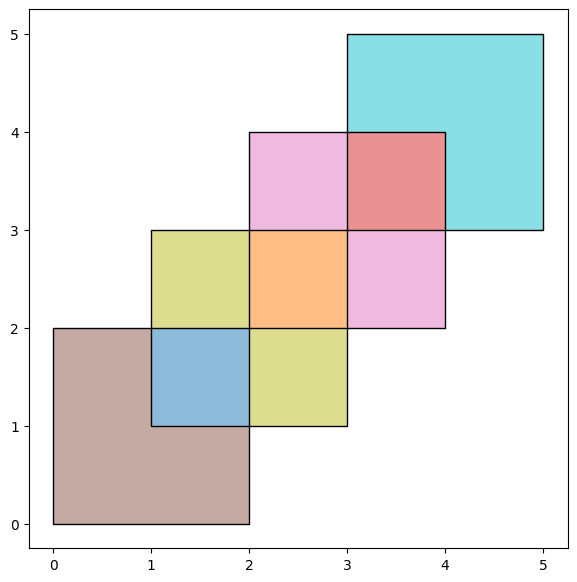

In [56]:
ax = res_union.plot(alpha=0.5, cmap='tab10', figsize=(7, 7))
df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

## Intersect

> The Intersect tool calculates the geometric intersection of any number of feature classes and feature layers. The features, or portion of features, that are **common** **(or shared)** to all inputs (that is, they intersect) will be written to the output feature class. Source: https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/how-intersect-analysis-works.htm





Diagrams below from: https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/how-intersect-analysis-works.htm

##### Polygon inputs and polygon output
![esri_intersect_poly_poly](https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/GUID-706759C5-5FA8-4130-B703-73217BD2752C-web.gif)

##### Line inputs
![esri_intersect_line_line](https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/GUID-3497102D-B719-48B1-80AA-8A3CB9099272-web.gif)

##### Line inputs and point output
![esri_intersect_line_point](https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/GUID-532D07A6-3CEB-4802-A6BE-444656EFC1D1-web.gif)



##### Point inputs
![esri_intersect_point_point](https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/GUID-6198BED6-DF77-4F42-84DB-65C75D154DEC-web.gif)

Diagrams above from: https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/how-intersect-analysis-works.htm


In [57]:
res_intersection = geopandas.overlay(
    df1, 
    df2, 
    how='intersection')

In [58]:
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2.00000 2.00000, 2.00000 1.00000, 1...."
1,2,1,"POLYGON ((2.00000 2.00000, 2.00000 3.00000, 3...."
2,2,2,"POLYGON ((4.00000 4.00000, 4.00000 3.00000, 3...."


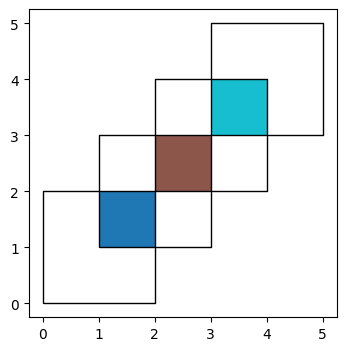

In [59]:
ax = res_intersection.plot(cmap='tab10', figsize=(4, 4))

df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

# Symetrical Difference

> Features or portions of features in the input and update features that do not overlap will be written to the output feature class. Source: https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/symmetrical-difference.htm

**Inverse** or opposite of the Intersect

![symetrical_difference](https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/GUID-71AC8941-636E-48AD-9C3F-942D4F8F520B-web.gif)

In [60]:
res_symdiff = geopandas.overlay(
    df1, 
    df2, 
    how='symmetric_difference')

res_symdiff

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0...."
1,2.0,NaN,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000..."
2,NaN,1.0,"MULTIPOLYGON (((2.00000 2.00000, 3.00000 2.000..."
3,NaN,2.0,"POLYGON ((3.00000 5.00000, 5.00000 5.00000, 5...."


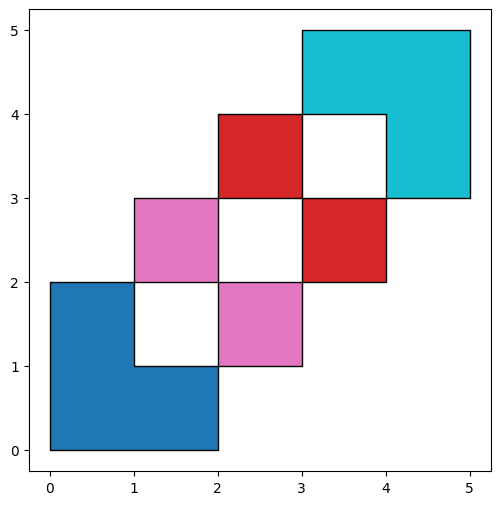

In [61]:
ax = res_symdiff.plot(cmap='tab10', figsize=(6, 6))

df1.plot(ax=ax, facecolor='none', edgecolor='k');
df2.plot(ax=ax, facecolor='none', edgecolor='k');

# Difference

Seems most similar to Esri's **Erase** overlay function. 

> Creates a feature class by overlaying the Input Features with the polygons of the Erase Features. Only those portions of the input features falling outside the erase features outside boundaries are copied to the output feature class. Source: https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/erase.htm

![difference_erase](https://desktop.arcgis.com/en/arcmap/10.3/tools/analysis-toolbox/GUID-40F0B845-07D7-4269-8E32-A5977821ADA2-web.gif)

In [62]:
res_difference = geopandas.overlay(
    df1, 
    df2, 
    how='difference')

res_difference  # ANY AREAS THAT DON'T OVERLAP - USE THE SECOND FEATURE TO ERASE FROM 1ST FEATURE

,geometry,df1
0,"POLYGON ((2.00000 0.00000, 0.00000 0.00000, 0....",1
1,"MULTIPOLYGON (((3.00000 3.00000, 4.00000 3.000...",2


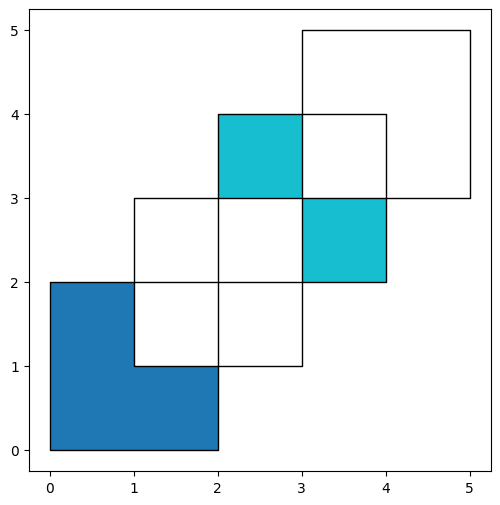

In [63]:
ax = res_difference.plot(cmap='tab10', figsize=(6, 6))

df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k');

# Dissolve 
https://geopandas.org/aggregation_with_dissolve.html

![dissolve](https://desktop.arcgis.com/en/arcmap/latest/tools/data-management-toolbox/GUID-B1553328-7E02-4A67-ABC9-2391F5D6C2CC-web.png)

Aggregates features based on specified attributes.
Source: https://desktop.arcgis.com/en/arcmap/latest/tools/data-management-toolbox/dissolve.htm

In [64]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

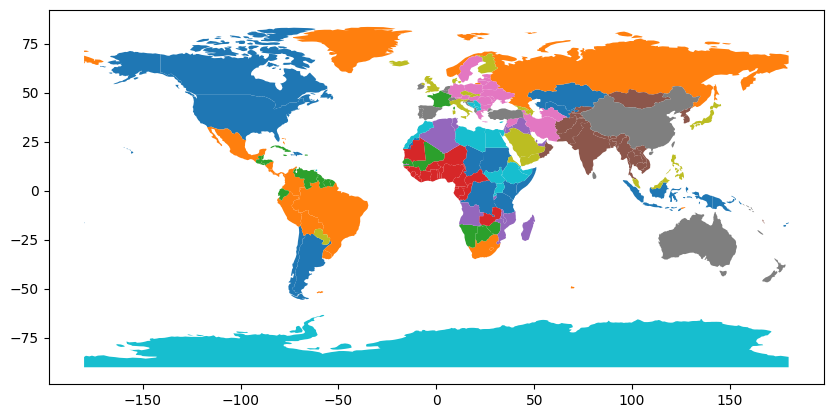

In [65]:
countries.plot(cmap='tab10', figsize=(10, 10));

#### Dissolve

In [66]:
countries = countries[['continent', 'geometry']]

In [67]:
continents = countries.dissolve(by='continent')

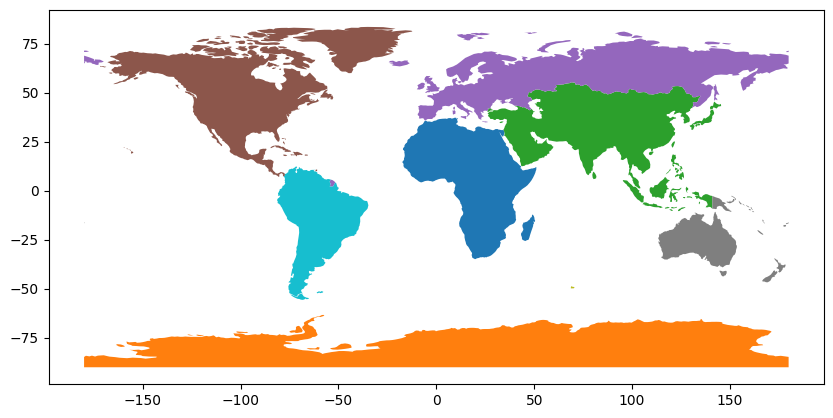

In [68]:
continents.plot(cmap='tab10', figsize=(10, 10));

## Dissolve and Sum

In [69]:
countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries.head(14)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [70]:
continents = countries.dissolve(
    by='continent', 
    aggfunc='sum')
continents

,geometry,pop_est,name,iso_a3,gdp_md_est
continent,,,,,
Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1.306370e+09,TanzaniaW. SaharaDem. Rep. CongoSomaliaKenyaSu...,TZAESHCODSOMKENSDNTCDZAFLSOZWEBWANAMSENMLIMRTB...,2455514
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4.490000e+03,Antarctica,ATA,898
Asia,"MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...",4.550277e+09,KazakhstanUzbekistanIndonesiaTimor-LesteIsrael...,KAZUZBIDNTLSISRLBNPSEJORAREQATKWTIRQOMNKHMTHAL...,32725478
Europe,"MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...",7.454125e+08,RussiaNorwayFranceSwedenBelarusUkrainePolandAu...,RUSNORFRASWEBLRUKRPOLAUTHUNMDAROULTULVAESTDEUB...,21587850
North America,"MULTIPOLYGON (((-155.22217 19.23972, -155.5421...",5.837560e+08,CanadaUnited States of AmericaHaitiDominican R...,CANUSAHTIDOMBHSGRLMEXPANCRINICHNDSLVGTMBLZPRIJ...,25075988
Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",4.120487e+07,FijiPapua New GuineaVanuatuNew CaledoniaSolomo...,FJIPNGVUTNCLSLBNZLAUS,1647113
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",1.400000e+02,Fr. S. Antarctic Lands,ATF,16
South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...",4.270667e+08,ArgentinaChileFalkland Is.UruguayBrazilBolivia...,ARGCHLFLKURYBRABOLPERCOLVENGUYSURECUPRY,3852015


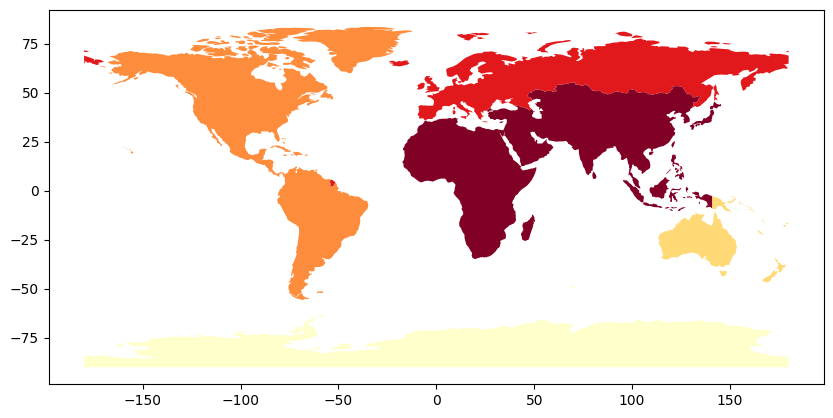

In [71]:
continents.plot(
    column = 'pop_est', 
    scheme='quantiles', 
    cmap='YlOrRd', 
    figsize=(10, 10),
);

# Merging Data

# Spatial Joins 

https://geopandas.org/mergingdata.html

In [72]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

countries = world[['geometry', 'name', 'pop_est', 'gdp_md_est']]
countries = countries.rename(columns={'name':'country'})

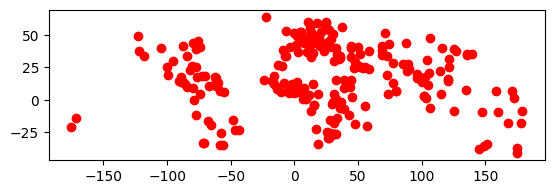

In [73]:
cities.plot(color='red');

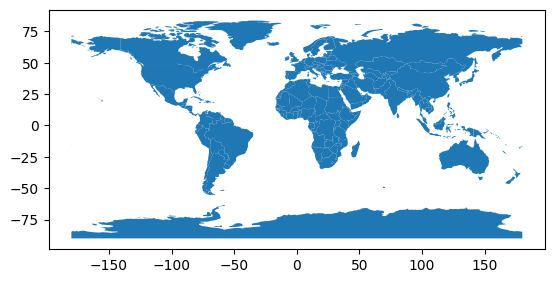

In [74]:
countries.plot();

In [75]:
countries.head()

,geometry,country,pop_est,gdp_md_est
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,889953.0,5496
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,58005463.0,63177
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara,603253.0,907
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,37589262.0,1736425
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,328239523.0,21433226


In [76]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Lobamba,POINT (31.20000 -26.46667)
4,Luxembourg,POINT (6.13000 49.61166)


#### Spatial Join to capture the Countries Data, specifically GDP, we want to "JOIN" Country GDP to the Cities

In [77]:
cities_with_country = geopandas.sjoin(
    cities, 
    countries, 
    how="inner", 
    op='intersects')

#### Let's look at the Spatially Joined Output

In [78]:
cities_with_country.head(20)

,name,geometry,index_right,country,pop_est,gdp_md_est
0,Vatican City,POINT (12.45339 41.90328),141,Italy,60297396.0,2003576
1,San Marino,POINT (12.44177 43.93610),141,Italy,60297396.0,2003576
226,Rome,POINT (12.48131 41.89790),141,Italy,60297396.0,2003576
2,Vaduz,POINT (9.51667 47.13372),114,Austria,8877067.0,445075
212,Vienna,POINT (16.36469 48.20196),114,Austria,8877067.0,445075
3,Lobamba,POINT (31.20000 -26.46667),73,eSwatini,1148130.0,4471
16,Mbabane,POINT (31.13333 -26.31665),73,eSwatini,1148130.0,4471
4,Luxembourg,POINT (6.13000 49.61166),128,Luxembourg,619896.0,71104
9,Bir Lehlou,POINT (-9.65252 26.11917),2,W. Sahara,603253.0,907
10,Monaco,POINT (7.40691 43.73965),43,France,67059887.0,2715518


#### Let's look at the output Geometry

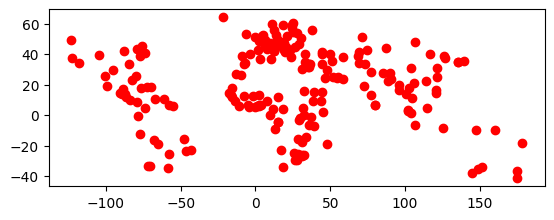

In [79]:
cities_with_country.plot(color='red');

#### Plotting our GDP values assigned to Cities as a Graduated Symbol

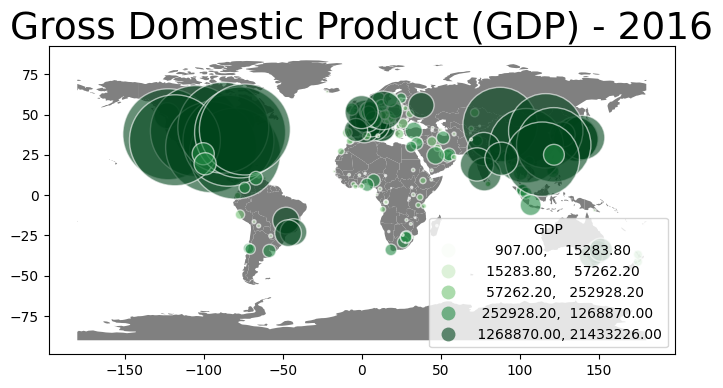

In [80]:
fig, ax = plt.subplots(figsize=(10, 4))

countries.plot(ax=ax, facecolor='gray')

cities_with_country.plot(ax=ax, column='gdp_md_est', scheme='quantiles', legend=True,
    cmap='Greens', edgecolor='white', alpha=0.6,
    markersize=cities_with_country['gdp_md_est']/5000.,
    legend_kwds={
        "title": 'GDP',
        "loc": 4})

plt.title('Gross Domestic Product (GDP) - 2016', {'fontsize': 27});
plt.savefig('img/gdp.png')

# Raster Data Model


### Raster

> [Rasters] are frequently represented as a continuous grid of square cells, each containing a value indicating the (estimated) average height or strength of the field in that cell. In most of the literature and within software packages the points/ lines/ areas model is described as vector data, whilst the grid model is described as raster (or image) data. Source: https://www.spatialanalysisonline.com/HTML/index.html




> #### Raster Basics
> A raster is a rectangular grid of pixels with values that can continuous (e.g. elevation) or categorical (e.g. land use). This data structure is very common - jpg images on the web, photos from your digital camera, and the jupyterhub icon are all rasters. Source: https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb

> Common properties of any raster:
number of rows and columns (sometimes referred to as lines and samples)
data type (dtype, or bit depth) - e.g., **8-bit (2^8 possible values, 0-255)**
some kind of resolution information, often dots per inch (dpi) with raster graphics
A geospatial raster is only different from a digital photo in that it is accompanied by metadata that connects the grid to a particular location. Source: https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb




> ![raster_data_model](https://github.com/geohackweek/raster-2019/raw/9fb57bde646eb98b881e0429e6a70ff4f8d077e1/assets/raster_concept.png)
_Source: National Ecological Observatory Network (NEON) via: [https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb](https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb)_



> ##### Examples of categorical rasters
Some rasters contain **categorical data** where each pixel represents a discrete class such as a landcover type (e.g., "coniferous forest" or "grassland") rather than a **continuous value** such as elevation or temperature. Some examples of classified maps include:
* Landcover / land-use maps.
* Snowcover masks (binary snow or no snow)

> The following map shows elevation data for the NEON Harvard Forest field site. In this map, the elevation data (a continuous variable) has been divided up into categories to yield a categorical raster.  Source: https://github.com/geohackweek/raster-2019/blob/master/notebooks/0-introduction.ipynb


### Land Use Raster (Discrete)

> ![category_raster](https://datacarpentry.org/organization-geospatial/fig/USA_landcover_classification.png)
_Source: Homer, C.G., et al., 2015, Completion of the 2011 National Land Cover Database for the conterminous United States-Representing a decade of land cover change information. Photogrammetric Engineering and Remote Sensing, v. 81, no. 5, p. 345-354) via [https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html](https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html)_



### Digital Elevation Raster (Continuous)

![dem](https://gisgeography.com/wp-content/uploads/2016/04/SRTM-550x296.png)
Source: https://gisgeography.com/free-global-dem-data-sources/

#### Raster and Resolution 

>  resolution of a raster represents the area on the ground that each pixel of the raster covers. The image below illustrates the effect of changes in resolution. Source: https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html

> ![raster_resolution](https://datacarpentry.org/organization-geospatial/fig/dc-spatial-raster/raster_resolution.png)
_Source: National Ecological Observatory Network (NEON) via [https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html](https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html)_



#### Multispectral (multiband) Raster

> A raster can contain one or more bands. One type of multi-band raster dataset that is familiar to many of us is a color image. A basic color image consists of three bands: red, green, and blue. Each band represents light reflected from the red, green or blue portions of the electromagnetic spectrum. The pixel brightness for each band, when composited creates the colors that we see in an image. Source: https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html

> ![multispectral_raster](https://datacarpentry.org/organization-geospatial/fig/dc-spatial-raster/RGBSTack_1.jpg)
_Source: National Ecological Observatory Network (NEON) via [https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html](https://datacarpentry.org/organization-geospatial/01-intro-raster-data/index.html)_


### Let's compare a two maps, one derived by Vector Data and one derived from Raster Data

In [81]:
import ipyleaflet  # source: https://github.com/geohackweek/raster-2019/blob/master/notebooks/3-visualization-and-modis.ipynb
from ipyleaflet import Map, Rectangle, basemaps, basemap_to_tiles, TileLayer, SplitMapControl, Polygon
import ipywidgets
import datetime
import re
bbox = [43.16, -11.32, 43.54, -11.96]
west, north, east, south = bbox
bbox_ctr = [0.5*(north+south), 0.5*(west+east)]

m = Map(center=bbox_ctr, zoom=5)  # MODIS great for large areas (onl)
right_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2020-04-01")
left_layer = TileLayer()
control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)
m

Map(center=[-11.64, 43.349999999999994], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_t…

### Let's take a look at some very simple Raster Data model

In [82]:
import numpy as np
import pandas as pd 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# let's allow our dataframe printouts in jupyter to be larger

In [83]:
simple_image = np.load('data/image_file.npy')   
# .npy is a numpy file storage format

### What is this simple_image?

In [84]:
simple_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  11, 104, 159, 159, 232, 195, 102,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  19, 154, 227, 254, 235, 174, 167, 233, 184,   0,   0,
          0,   0],
       [  

### Plotting this image data in Pandas aas an .ndarray like a DataFrame?

In [85]:
pd.DataFrame(simple_image).head(28)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,104,159,159,232,195,102,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,154,227,254,235,174,167,233,184,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106,217,254,239,159,23,0,0,68,221,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,72,249,251,131,11,0,0,53,13,2,40,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,26,243,250,72,0,0,5,184,251,103,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,152,254,170,0,0,0,148,254,254,85,0,0,0,0,0,0


### Interesting... Perhaps I can "show this array" somehow!

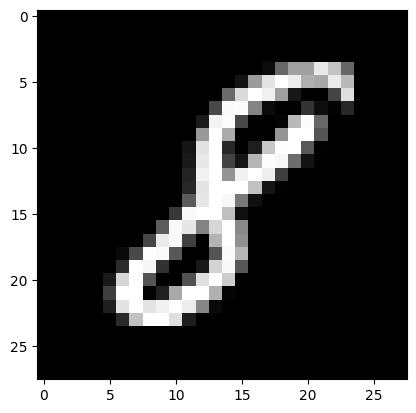

In [86]:
import matplotlib.pyplot as plt

plt.imshow(simple_image, cmap='gray')
plt.show();

### Let's look at some LANDSAT 8 Data

> Bands 2, 3, and 4 are visible blue, green, and red. Source: https://landsat.gsfc.nasa.gov/landsat-8/landsat-8-bands/


Much of this is referenced from: https://automating-gis-processes.github.io/CSC/lessons/L5/overview.html

In [87]:
import urllib

# https://automating-gis-processes.github.io/CSC/notebooks/L5/reading-raster.html
raster_url = 'https://github.com/Automating-GIS-processes/CSC18/raw/master/data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif'
helsinki_local_file = 'data/raster/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif'

In [88]:
urllib.request.urlretrieve(raster_url, helsinki_local_file)

('data/raster/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif',
 <http.client.HTTPMessage at 0x7f3f646e0040>)

# Rasterio 

> Rasterio: access to geospatial raster data
    
> Geographic information systems use GeoTIFF and other formats to organize and store gridded raster datasets such as satellite imagery and terrain models. Rasterio reads and writes these formats and provides a Python API based on Numpy N-dimensional arrays and GeoJSON.
Source: https://rasterio.readthedocs.io/en/latest/index.html

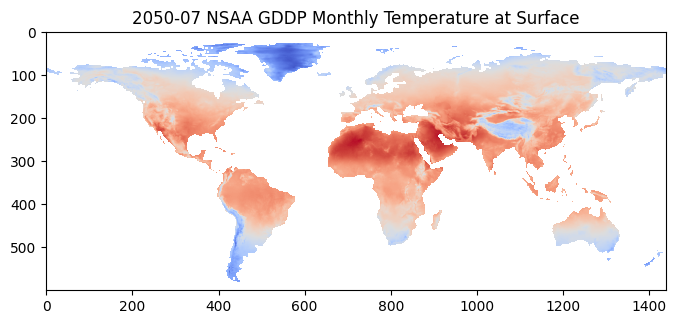

In [89]:
import rasterio
cog = 'https://nex-gddp-cmip6-cog.s3-us-west-2.amazonaws.com/monthly/CMIP6_ensemble_median/tas/tas_month_ensemble-median_ssp585_205007.tif'

dataset = rasterio.open(cog)
plt.figure(figsize=(8, 8))
plt.imshow(dataset.read(1), cmap='coolwarm')
plt.title('2050-07 NSAA GDDP Monthly Temperature at Surface');

In [90]:
import rasterio # Helsinki multi band LANDSAT data

dataset = rasterio.open(helsinki_local_file)
dataset

<open DatasetReader name='data/raster/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif' mode='r'>

####  How many Bands? 

In [91]:
dataset.count 
# number of raster bands

7

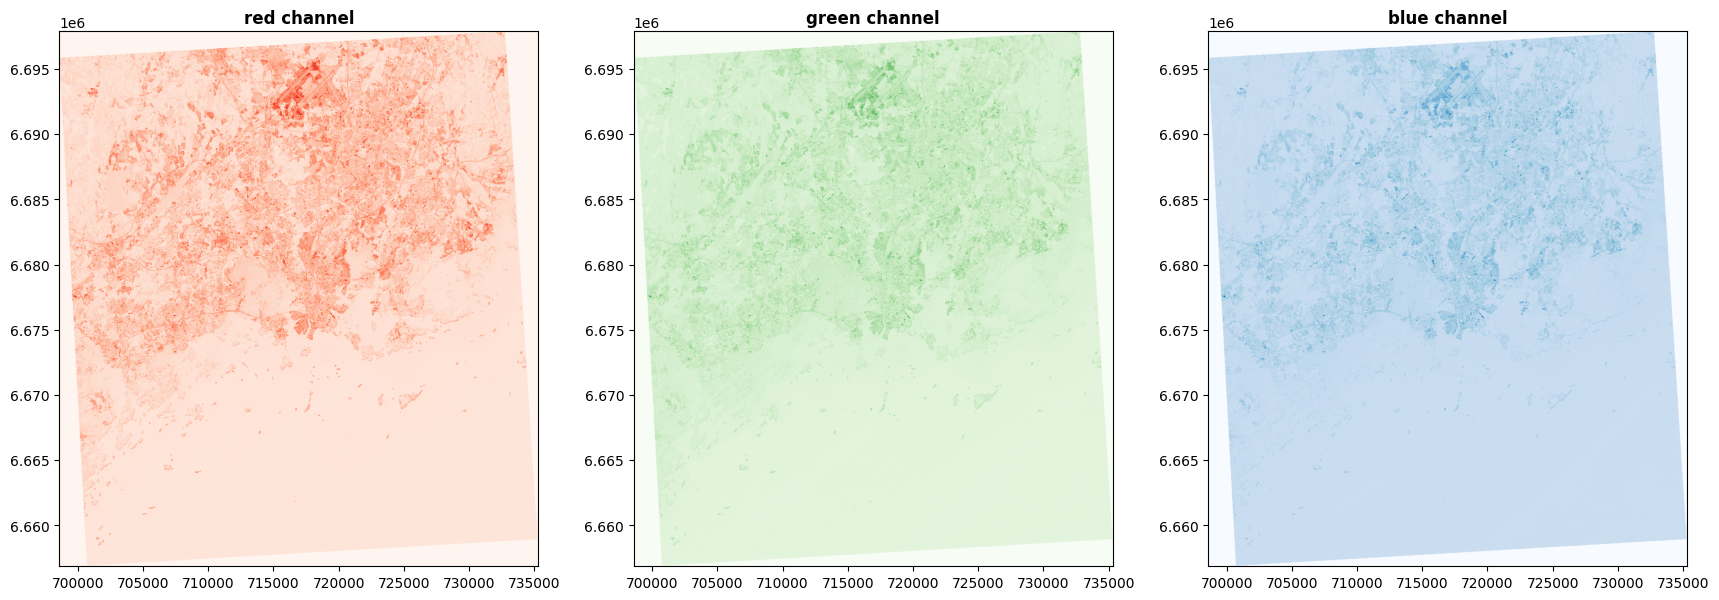

In [92]:
from matplotlib import pyplot
from rasterio.plot import show

fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
show((dataset, 3), ax=axr, cmap='Reds', title='red channel')
show((dataset, 2), ax=axg, cmap='Greens', title='green channel')
show((dataset, 1), ax=axb, cmap='Blues', title='blue channel')
pyplot.show()

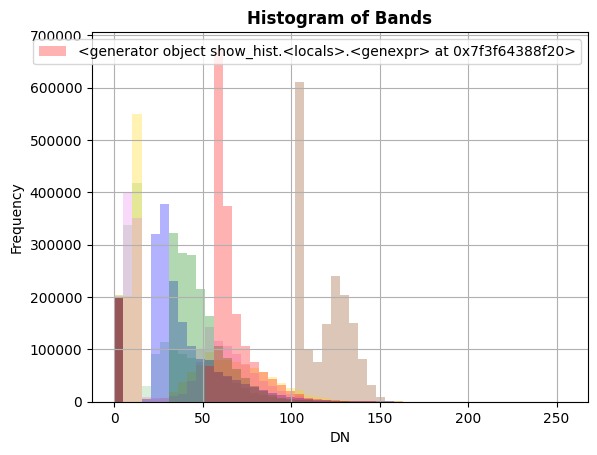

In [93]:
from rasterio.plot import show_hist

show_hist(
    dataset, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram of Bands")

In [94]:
dataset.bounds

BoundingBox(left=698592.0, bottom=6656859.0, right=735300.0, top=6697870.5)

## Raster Operations

### Raster Math 

![raster-math](https://desktop.arcgis.com/en/arcmap/10.7/tools/spatial-analyst-toolbox/GUID-D8BD897C-B7A2-46A5-93DC-121409FF4C0D-web.png)

Source: https://desktop.arcgis.com/en/arcmap/10.7/tools/spatial-analyst-toolbox/cell-statistics.htm

## Sampling Raster Values

In [95]:
sample_coordinates = [
    (716946.0, 6677364.75),
    (713046.0, 6676164.75),
    (714846.0, 6666164.75),
    (720846.0, 6668164.75),
]

samples = [x for x in dataset.sample(sample_coordinates)]

In [96]:
samples

[array([ 65,  48,  34,  44,  41, 128,  27], dtype=uint8),
 array([ 85,  70,  69,  49,  78, 125,  61], dtype=uint8),
 array([ 55,  34,  25,  10,  10, 105,  11], dtype=uint8),
 array([ 59,  34,  28,  11,  11, 104,  10], dtype=uint8)]

## Zonal Statistics 

![img](https://gisgeography.com/wp-content/uploads/2020/10/Zonal-Statistics.png)

Source: https://gisgeography.com/zonal-statistics/


Zonal statistics summarizes the cells for a given region or line. 


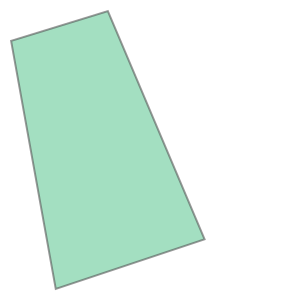

In [97]:
from shapely.geometry import Polygon
Polygon(sample_coordinates)

In [96]:
from shapely.geometry import mapping, Polygon
import fiona

poly = Polygon(sample_coordinates)

schema = {'geometry': 'Polygon'}

with fiona.open('data/sample_coordinates.shp', 'w', 'ESRI Shapefile', schema) as c:
    c.write({'geometry': mapping(poly)})
    
# save a shapefile with fiona

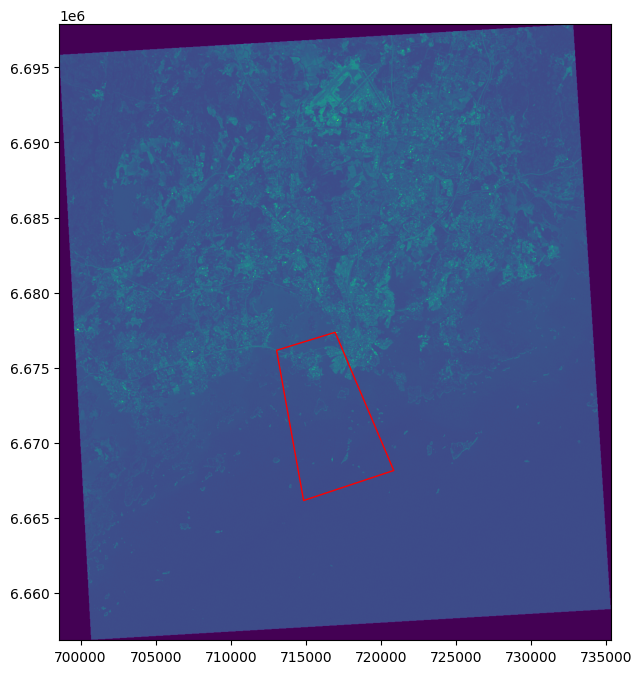

In [97]:
import geopandas as gpd
from matplotlib import pyplot as plt
from rasterio.plot import show
fig, ax = plt.subplots(figsize=(8, 8))
p = gpd.GeoSeries(poly)
p.plot(ax=ax, facecolor='none', edgecolor='red')

rasterio.plot.show(dataset, ax=ax)
plt.show()

In [98]:
from rasterstats import zonal_stats

### Band 1

In [99]:
stats = zonal_stats('data/sample_coordinates.shp', helsinki_local_file, band=1, stats=['min', 'max', 'median', 'majority', 'sum'])
stats

[{'min': 27.0,
  'max': 252.0,
  'sum': 4118148.0,
  'median': 61.0,
  'majority': 60.0}]

### Band 6

In [100]:
stats = zonal_stats('data/sample_coordinates.shp', helsinki_local_file, band=6, stats=['min', 'max', 'median', 'majority', 'sum'])
stats

[{'min': 103.0,
  'max': 160.0,
  'sum': 6997422.0,
  'median': 106.0,
  'majority': 105.0}]

# Geocoding

> Geocoding is the process of taking input text, such as an address or the name of a place, and returning a latitude/longitude location on the Earth's surface for that place.[1] Reverse geocoding, on the other hand, converts geographic coordinates to a description of a location, usually the name of a place or an addressable location. Source: https://en.wikipedia.org/wiki/Geocoding



![geocoding](https://geospatialmedia.s3.amazonaws.com/wp-content/uploads/2018/05/geocoding-graph.jpg)
_Source: Source: SCHOOL ANALYST via [Geospatial World](https://www.geospatialworld.net/blogs/what-is-geocoding-and-how-can-it-help-sell-products/)_

> Geocoding relies on a computer representation of address points, the street / road network, together with postal and administrative boundaries. 


* **Geocode** (verb):[2] provide geographical coordinates corresponding to (a location).
* **Geocode** (noun): is a code that represents a geographic entity (location or object). Sometimes the term can be used in a broader sense:[3] the characterization of a neighborhood, locality, etc., according to such demographic features as ethnic composition or the average income or educational level of its inhabitants, especially as used in marketing.
* **Geocoder** (noun): a piece of software or a (web) service that implements a geocoding process i.e. a set of interrelated components in the form of operations, algorithms, and data sources that work together to produce a spatial representation for descriptive locational references. 





### Geocode Example Google Maps
![geocode_example](https://fiverr-res.cloudinary.com/images/q_auto,f_auto/gigs/140227598/original/d698ad984715b5777e94b3ddb24f3c9ac95176e6/geocode-address-and-return-latitude-and-longitude.png)
_Source: [Fiverr](https://www.fiverr.com/roseannhall150/geocode-address-and-return-latitude-and-longitude)_

> The geographic coordinates representing locations often vary greatly in positional accuracy. Examples include building centroids, land parcel centroids, interpolated locations based on thoroughfare ranges, street segments centroids, postal code centroids (e.g. ZIP codes, CEDEX), and Administrative division Centroids. Source: https://en.wikipedia.org/wiki/Geocoding

## Geocoding with GeoPy


### Installing Geopy

```$ pip install geopy```


### About GeoPy

> geopy is a Python 2 and 3 client for several popular geocoding web services. geopy makes it easy for Python developers to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources. Source: https://geopy.readthedocs.io/en/stable/


### GeoPy Geocoder Services

* ArcGIS
* AzureMaps
* Baidu
* BANFrance
* Bing
* DataBC
* GeocodeEarth
* GeocodeFarm
* Geolake
* GeoNames
* GoogleV3
* HERE
* IGNFrance
* MapBox
* OpenCage
* OpenMapQuest
* Nominatim
* Pelias
* Photon
* PickPoint
* LiveAddress
* TomTom
* What3Words
* Yandex

In [101]:
import uuid
from geopy.geocoders import Nominatim

#### Create a new variable called `geolocator` as our object of the `Nominatim()` geocoding class

In [102]:
geolocator = Nominatim(user_agent=f"{uuid.uuid4()}")

#### Let's create a variable called `location` that geocodes "175 5th Avenue NYC".

In [103]:
location = geolocator.geocode("175 5th Avenue NYC")

#### Let's see this `location`'s standardized geocoded address.

In [104]:
print(location.address)

Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10010, United States


#### Do you think this `location` object has a latitude and longitude???

In [105]:
print(location.raw)

{'place_id': 173708720, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 264768896, 'boundingbox': ['40.7407596', '40.7413004', '-73.9898715', '-73.9895014'], 'lat': '40.741059199999995', 'lon': '-73.98964162240998', 'display_name': 'Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10010, United States', 'class': 'tourism', 'type': 'attraction', 'importance': 0.7405988542685404, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_point_of_interest.p.20.png'}


#### Let's see what the `type()` is of `location.point`

In [106]:
type(location.point)

geopy.point.Point

In [107]:
import warnings
warnings.filterwarnings('ignore')
# See README.md for all libraries and steps to create the environment. 

import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import rasterio
from rasterstats import zonal_stats
import numpy as np
import osmnx as ox

%matplotlib inline

# OSMnx: 

Python for street networks. Retrieve, model, analyze, and visualize street networks and other spatial data from OpenStreetMap.

In [108]:
pratt_network = ox.graph_from_address(
    address='200 Willoughby Ave, Brooklyn, NY 11205', 
    dist=1000,   # meters
    dist_type='network',
    retain_all=True,
    truncate_by_edge=False,
    simplify=False)

In [109]:
# you can project the network to UTM (zone calculated automatically)
pratt_network_projected = ox.project_graph(pratt_network)
# source: https://github.com/gboeing/osmnx-examples/tree/master/notebooks
graph_gdfs = ox.graph_to_gdfs(pratt_network_projected, edges=True, fill_edge_geometry=True)
pratt_intersections = graph_gdfs[0]
pratt_streets = graph_gdfs[1]

In [110]:
from geopy.geocoders import Nominatim
from shapely.geometry import Point  # importing the Point class
from geopandas import GeoDataFrame

data = {'address': ['200 Willoughby Ave, Brooklyn, NY 11205'], 'name': ['Pratt']}

geolocator = Nominatim(user_agent='pratt_geospatial')

df = pd.DataFrame(data, columns=data.keys())

df['geocode'] = df['address'].apply(geolocator.geocode)  

df['geometry'] = df['geocode'].apply(
    lambda x: 
        Point(x.longitude, x.latitude)
) # create a geometry column

address = GeoDataFrame(df, geometry='geometry', crs='epsg:4326')
pratt_point = address[address['address'] == '200 Willoughby Ave, Brooklyn, NY 11205']

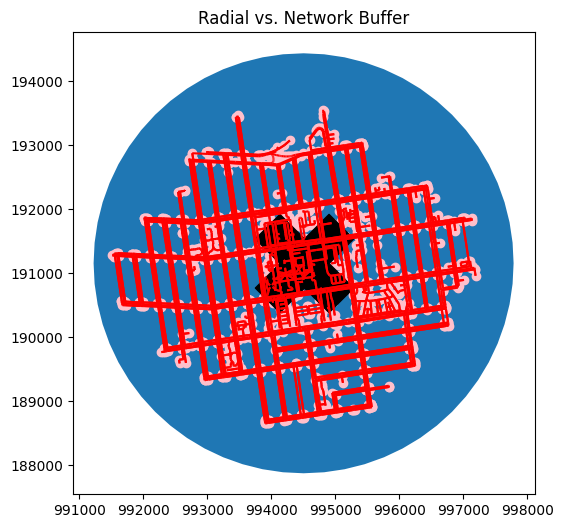

In [111]:
# source: https://github.com/gboeing/osmnx-examples/tree/master/notebooks
fig, ax = plt.subplots(figsize=(6, 6))

pratt_point.to_crs(epsg=2263).buffer(3280.84).plot(ax=ax)  # 2 km buffer
pratt_streets.to_crs(epsg=2263).plot(ax=ax, color='red')
pratt_intersections.to_crs(epsg=2263).plot(ax=ax, color='pink')

pratt_point.to_crs(epsg=2263).plot(ax=ax, color='black', markersize=5000, marker='X')  # 2 km buffer


plt.title('Radial vs. Network Buffer')

plt.show();

# Routing

In [112]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm', width=1000, height=600)

In [113]:
print(
    'The End. Thank You!!!\n\n\n'
    "I'll stick around for any questions between speakers")

The End. Thank You!!!


I'll stick around for any questions between speakers


# Additional Resources

* Class for Pratt SAVI 810 2020-03: Intro to Python Scripting for Geospatial - https://github.com/pratt-savi-810/pratt-savi-810-2020-03
* Geographic Data Science Lab is a research centre at the University of Liverpool -  https://www.liverpool.ac.uk/geographic-data-science/
* CSC Finland – IT Center for Science - Welcome to Introduction to Python GIS -course 2018 - https://automating-gis-processes.github.io/CSC/index.html
* Geographic Data Science, a course designed by Dr. Dani Arribas-Bel - https://darribas.org/gds_course/content/home.html